In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  #String to numeric.When maximum column is string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords') #Stopwords = commonly used english words
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('C:/Users/Aspir/Documents/Spam/static/spam.csv')
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5584  spam  Congrats 843136XXXX,\nRs 23,650 credited to yo...        NaN   
5585  spam  Hi 843136XXXX,\nGet Full Body checkup with 81 ...        NaN   
5586  spam  Good News 8431364807, Transaction successfully...        NaN   
5587  spam  Best Health Insurance Plan For You!\nGet Cover...        NaN   
5588  spam  TrxnDate  My name is Edna, urgently need worke...        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5584        NaN        NaN  
5585        NaN        NaN  
5586        NaN        NaN  
5587        NaN        NaN  
5588        NaN        NaN  

[5589 rows x 5 columns]

In [4]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5584  spam  Congrats 843136XXXX,\nRs 23,650 credited to yo...
5585  spam  Hi 843136XXXX,\nGet Full Body checkup with 81 ...
5586  spam  Good News 8431364807, Transaction successfully...
5587  spam  Best Health Insurance Plan For You!\nGet Cover...
5588  spam  TrxnDate  My name is Edna, urgently need worke...

[5589 rows x 2 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5589 non-null   object
 1   v2      5589 non-null   object
dtypes: object(2)
memory usage: 87.5+ KB


In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5589 non-null   object
 1   v2      5589 non-null   object
dtypes: object(2)
memory usage: 87.5+ KB


In [7]:
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])
print(data['v1'])

0       0
1       0
2       1
3       0
4       0
       ..
5584    1
5585    1
5586    1
5587    1
5588    1
Name: v1, Length: 5589, dtype: int32


In [8]:
stp_words = stopwords.words('english')
def clean_message(message):
    clean_message = " ".join(word for word in message.split() if word not in stp_words)
    return clean_message

data['v2'] = data['v2'].apply(clean_message)
print(data.v2)

# def lower_message(message):
#     lower_message = " ".join(word for word in message.lower())
#     return lower_message

# data['v2'] = data['v2'].apply(lower_message)
# print(data.v2)

0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5584    Congrats 843136XXXX, Rs 23,650 credited Ludo A...
5585    Hi 843136XXXX, Get Full Body checkup 81 Tests ...
5586    Good News 8431364807, Transaction successfully...
5587    Best Health Insurance Plan For You! Get Covera...
5588    TrxnDate My name Edna, urgently need workers 1...
Name: v2, Length: 5589, dtype: object


In [9]:
    data['v1'].value_counts()

v1
0    4825
1     764
Name: count, dtype: int64

v1
0    4825
1     764
Name: count, dtype: int64


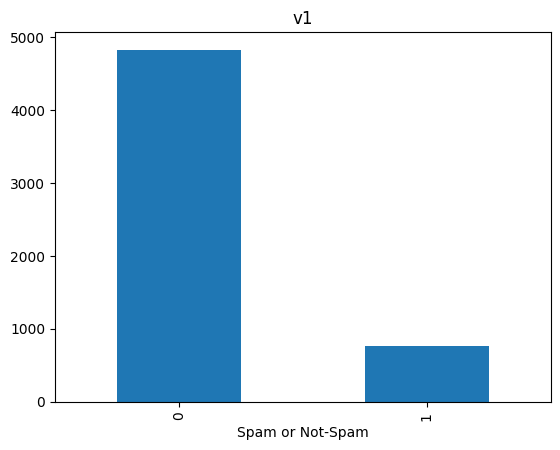

In [10]:
trans = data['v1'].value_counts()
print(trans)
trans.plot.bar()
plt.title('v1')
plt.xlabel("Spam or Not-Spam")
plt.show()

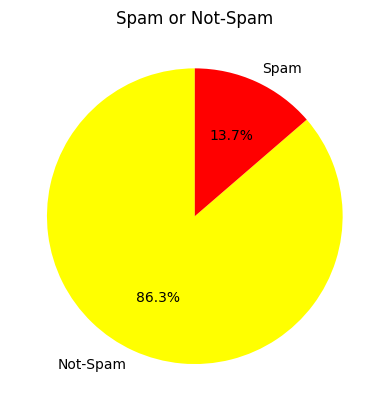

In [11]:
x = data['v1'].value_counts()
y = 'Not-Spam', 'Spam'

plt.pie(x,labels = y,autopct = '%1.1f%%',startangle = 90,colors = ['yellow','red'])
plt.title('Spam or Not-Spam')
plt.show()

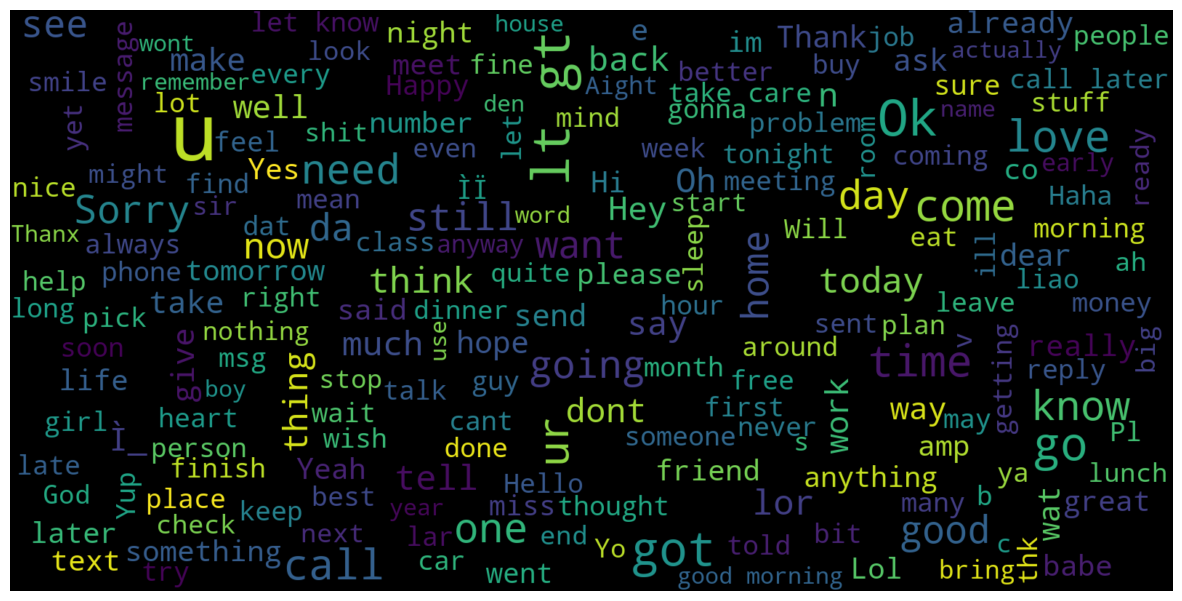

In [12]:
consolidated = ' '.join(word for word in data['v2'][data['v1'] == 0].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

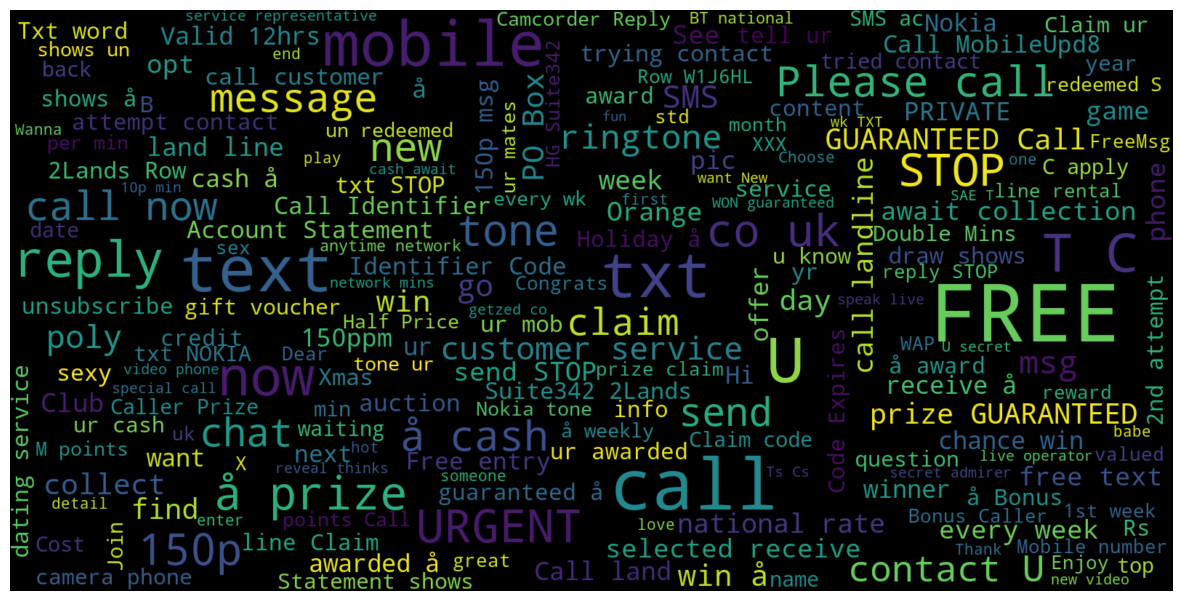

In [13]:
consolidated = ' '.join(word for word in data['v2'][data['v1'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['v2']).toarray()
print(X)

Y = data['v1']

with open('cv.pkl','wb') as file:
    pickle.dump(cv, file)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.27618075 0.24230061 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [15]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)

#Apply SMOTE to resample the dataset
X_resampled,y_resampled = smote.fit_resample(X,Y)
y_resampled.value_counts()

v1
0    4825
1    4825
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [17]:
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(x_train.shape)
print(x_test.shape)

(4191, 2500)
(1398, 2500)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

import pickle
pickle.dump(model,open('model_save.pkl','wb'))

model = pickle.load(open('model_save.pkl','rb'))

0.9635193133047211
[0 0 0 ... 0 0 0]


In [20]:
def predict_sentiment(message_text):
    #Preprocess the input review
    cleaned_message = clean_message(message_text)
    #Transfrom the review using the TF-IDF vectorizer    
    transformed_message = cv.transform([cleaned_message]).toarray()
    #Predict sentiment using the trained model    
    prediction = model.predict(transformed_message)

    if prediction[0] == 1:
        return 'Spam'
    else:
        return 'Not-Spam'

#Now you can use the predict_sentiment function to classify reviews
input_message = input('Enter the Mail::')
result = predict_sentiment(input_message)
print(f'This Mail is {result}')

This Mail is Spam
